Import Dependencies
Standard Python libraries used for -------------

In [1]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

Data Ingestion
Loading the data from credit_card_transactions.csv and checking the initial few rows.

In [3]:
# Read the CSV file into a dataframe
data = pd.read_csv('credit_card_transactions.csv')

# Display the first few records
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


Data Exploration
Explore the dataframe to assess for necessary pre-processing steps like null value handling and feature engineering

In [4]:
# Explore data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
# function to get number of unique values for each column ..
# to determine what kind of encoding and imputation needs to be done!

def display_unique_values(data):
    """
    Display unique values and the number of unique values for each column in the dataframe.

    Parameters:
    data (pd.DataFrame): The dataframe to analyze.

    Returns:
    None
    """
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"Column: {column}")
        print(f"Data Type: {data[column].dtype}")
        print(f"Number of Unique Values: {len(unique_values)}")
        print(f"Unique Values: {unique_values[:10]}...")  # Show the first 10 unique values for brevity
        print("-" * 50)

# Display details of each column:
display_unique_values(data)

Column: Unnamed: 0
Data Type: int64
Number of Unique Values: 1296675
Unique Values: [0 1 2 3 4 5 6 7 8 9]...
--------------------------------------------------
Column: trans_date_trans_time
Data Type: object
Number of Unique Values: 1274791
Unique Values: ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51'
 '2019-01-01 00:01:16' '2019-01-01 00:03:06' '2019-01-01 00:04:08'
 '2019-01-01 00:04:42' '2019-01-01 00:05:08' '2019-01-01 00:05:18'
 '2019-01-01 00:06:01']...
--------------------------------------------------
Column: cc_num
Data Type: int64
Number of Unique Values: 983
Unique Values: [2703186189652095     630423337322   38859492057661 3534093764340240
  375534208663984 4767265376804500   30074693890476 6011360759745864
 4922710831011201 2720830304681674]...
--------------------------------------------------
Column: merchant
Data Type: object
Number of Unique Values: 693
Unique Values: ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckr


Data Cleaning
Cleaning and preprocessing the dataset by removing unnecessary columns and converting date columns.

In [6]:
# Make a copy for transformation
ak_df = data.copy()

# Convert date columns to datetime format
ak_df['trans_date_trans_time'] = pd.to_datetime(ak_df['trans_date_trans_time'])
ak_df['dob'] = pd.to_datetime(ak_df['dob'])

Feature Engineering - Age Patterns

In [7]:
ak_df['ft_age'] = ak_df['trans_date_trans_time'].dt.year - ak_df['dob'].dt.year

# AGE SEGMENT - Define age segments
def age_segment(age):
    if age < 18:
        return 'Under 18'
    elif 19 <= age <= 28:
        return '19-28'
    elif 29 <= age <= 38:
        return '29-38'
    elif 39 <= age <= 48:
        return '39-48'
    elif 49 <= age <= 58:
        return '49-58'
    elif 59 <= age <= 68:
        return '59-68'
    elif 69 <= age <= 78:
        return '69-78'
    else:
        return '79+'

# Apply age segmentation
ak_df['ft_age_group'] = ak_df['ft_age'].apply(age_segment)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,ft_age,ft_age_group
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,31,29-38
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,41,39-48
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,57,49-58
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,52,49-58
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,33,29-38


Feature Engineering - Temporal Patterns

In [8]:
# TRANSACTION HOUR
ak_df['ft_trans_hour'] = ak_df['trans_date_trans_time'].dt.hour

# TIME OF DAY - Categorize time of day based on transaction hour
ak_df['ft_time_of_day'] = ak_df['trans_date_trans_time'].dt.hour.apply(
    lambda hour: 'Morning' if 6 <= hour < 12 else
    ('Afternoon' if 12 <= hour < 18 else
    ('Evening' if 18 <= hour < 24 else 'Night'))
)

# TRANSACTION DAY
ak_df['ft_trans_day'] = ak_df['trans_date_trans_time'].dt.day

# TRANSACTION DAY OF YEAR
ak_df['ft_trans_day_of_year'] = ak_df['trans_date_trans_time'].dt.dayofyear

# TRANSACTION MONTH
ak_df['ft_trans_month'] = ak_df['trans_date_trans_time'].dt.month

# DAY OF WEEK - Add a new column 'day_of_week' to represent the day of the week (0=Monday, 6=Sunday)
ak_df['ft_day_of_week'] = ak_df['trans_date_trans_time'].dt.day_name()


ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,is_fraud,merch_zipcode,ft_age,ft_age_group,ft_trans_hour,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_day_of_week
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,28705.0,31,29-38,0,Night,1,1,1,Tuesday
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0,NaN,41,39-48,0,Night,1,1,1,Tuesday
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,83236.0,57,49-58,0,Night,1,1,1,Tuesday
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,NaN,52,49-58,0,Night,1,1,1,Tuesday
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,22844.0,33,29-38,0,Night,1,1,1,Tuesday


Feature Engineering - Distance Patterns
Distance between user and merchant for the transaction
Large deviations in the transaction’s location compared to the user’s regular pattern could indicate fraud

In [9]:
# DISTANCE BETWEEN USER AND MERCHANT

import numpy as np

# Define the Haversine Formula function that calculates the distance given two latitude/longitude points
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius = 6371  # Radius of Earth in kilometers
    return radius * c

# Create a new column for distance
ak_df['ft_distance_user_merchant'] = haversine(
    ak_df['lat'], ak_df['long'],
    ak_df['merch_lat'], ak_df['merch_long']
)

# Calculate the average distance of previous transactions for a user and compare the current transaction distance
user_avg_distance = ak_df.groupby('cc_num')['ft_distance_user_merchant'].transform('mean')
ak_df['ft_merchant_distance_from_user_mean'] = ak_df['ft_distance_user_merchant'] - user_avg_distance


ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_age,ft_age_group,ft_trans_hour,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,31,29-38,0,Night,1,1,1,Tuesday,78.597568,0.637376
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,41,39-48,0,Night,1,1,1,Tuesday,30.212176,-41.580370
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,57,49-58,0,Night,1,1,1,Tuesday,108.206083,34.130756
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,52,49-58,0,Night,1,1,1,Tuesday,95.673231,23.971060
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,33,29-38,0,Night,1,1,1,Tuesday,77.556744,2.322402



Feature Engineering - Merchant Popularity
Uncommon merchants with a low transaction count might be associated with fraud

In [10]:
# Count the number of transactions for each merchant in the dataset
merchant_transaction_counts = ak_df['merchant'].value_counts()
ak_df['ft_merchant_popularity'] = ak_df['merchant'].map(merchant_transaction_counts)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_age_group,ft_trans_hour,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,29-38,0,Night,1,1,1,Tuesday,78.597568,0.637376,1267
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,39-48,0,Night,1,1,1,Tuesday,30.212176,-41.580370,2503
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,49-58,0,Night,1,1,1,Tuesday,108.206083,34.130756,1895
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,49-58,0,Night,1,1,1,Tuesday,95.673231,23.971060,2613
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,29-38,0,Night,1,1,1,Tuesday,77.556744,2.322402,1592


Feature Engineering - User Spending Behavior: Mean Transaction Amount (mean_amt_per_user)
Transactions significantly above or below the user’s average spending pattern may indicate fraud

In [11]:
# Calculate the mean transaction amount for each user (cc_num)
user_mean_amt = ak_df.groupby('cc_num')['amt'].transform('mean')
ak_df['ft_mean_amt_per_user'] = user_mean_amt

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_hour,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,Night,1,1,1,Tuesday,78.597568,0.637376,1267,87.393215
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0,Night,1,1,1,Tuesday,30.212176,-41.580370,2503,53.949320
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,Night,1,1,1,Tuesday,108.206083,34.130756,1895,65.870040
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,Night,1,1,1,Tuesday,95.673231,23.971060,2613,72.776673
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,Night,1,1,1,Tuesday,77.556744,2.322402,1592,95.178091


Feature Engineering - Transaction Amount Deviation (amt_deviation)
Sudden changes in spending behavior (either very high or very low) could be a red flag

In [12]:
# Calculate the deviation of the transaction amount from the user’s mean transaction amount
ak_df['ft_amt_deviation'] = ak_df['amt'] - ak_df['ft_mean_amt_per_user']

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,Night,1,1,1,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Night,1,1,1,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Night,1,1,1,Tuesday,108.206083,34.130756,1895,65.870040,154.239960
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Night,1,1,1,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Night,1,1,1,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091


Feature Engineering - Transaction Frequency (transaction_count_per_user)
Users with abnormally high transaction counts might exhibit fraudulent behavior

In [13]:
# Count the number of transactions for each user (cc_num)
user_transaction_count = ak_df['cc_num'].value_counts()
ak_df['ft_transaction_count_per_user'] = ak_df['cc_num'].map(user_transaction_count)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,1,1,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,1,1,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1,1,1,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,1,1,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1,1,1,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017


Feature Engineering - Fraud Rate by State (state_fraud_rate)
States with unusually high fraud rates could signal suspicious activity

In [14]:
# Calculate the fraud rate for each state by dividing the number of fraudulent transactions by the total number of transactions
fraud_rate_by_state = ak_df.groupby('state')['is_fraud'].mean()
ak_df['ft_state_fraud_rate'] = ak_df['state'].map(fraud_rate_by_state)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_day_of_year,ft_trans_month,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,1,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028,0.004923
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,1,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030,0.005073
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1,1,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503,0.001984
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,1,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493,0.002722
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1,1,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017,0.006769



Feature Engineering - Recurring Transaction Flag (is_recurring)
Recurring transactions are less likely to be fraudulent

# Flag transactions as recurring if the same merchant and cc_num combination appears multiple times within a short period
ak_df['ft_transaction_is_recurring'] = ak_df.duplicated(subset=['cc_num', 'merchant'], keep=False).astype(int)

ak_df.head()

In [15]:
# lets review the current columns of the updated dataframe
ak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 39 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   Unnamed: 0                           1296675 non-null  int64         
 1   trans_date_trans_time                1296675 non-null  datetime64[ns]
 2   cc_num                               1296675 non-null  int64         
 3   merchant                             1296675 non-null  object        
 4   category                             1296675 non-null  object        
 5   amt                                  1296675 non-null  float64       
 6   first                                1296675 non-null  object        
 7   last                                 1296675 non-null  object        
 8   gender                               1296675 non-null  object        
 9   street                               1296675 non-null  ob

In [16]:
# Drop unnecessary columns
columns_to_drop = [
    'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'trans_num', 'lat', 
    'long', 'merch_zipcode', 'ft_age', 'merch_lat', 'merch_long', 'trans_num', 'unix_time', 'zip', 'dob'
]
ak_df_cleaned = ak_df.drop(columns=columns_to_drop)

ak_df_cleaned.head()

# Check for null values
# print(ak_df_cleaned.isnull().sum())

,merchant,category,amt,gender,city,state,city_pop,job,is_fraud,ft_age_group,...,ft_trans_day_of_year,ft_trans_month,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0,29-38,...,1,1,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028,0.004923
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0,39-48,...,1,1,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030,0.005073
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0,49-58,...,1,1,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503,0.001984
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0,49-58,...,1,1,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493,0.002722
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0,29-38,...,1,1,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017,0.006769


In [17]:
# Explore data columns
ak_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   merchant                             1296675 non-null  object 
 1   category                             1296675 non-null  object 
 2   amt                                  1296675 non-null  float64
 3   gender                               1296675 non-null  object 
 4   city                                 1296675 non-null  object 
 5   state                                1296675 non-null  object 
 6   city_pop                             1296675 non-null  int64  
 7   job                                  1296675 non-null  object 
 8   is_fraud                             1296675 non-null  int64  
 9   ft_age_group                         1296675 non-null  object 
 10  ft_trans_hour                        1296675 non-null  int32  
 11


SPlit the Data for training
To DO: For final code, we need to split the data in train, validation and test

In [18]:
# Setup X and y variables
X = ak_df_cleaned.drop(columns='is_fraud')
y = ak_df_cleaned['is_fraud'].values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.describe()

,amt,city_pop,ft_trans_hour,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate
count,972506.000000,9.725060e+05,972506.000000,972506.000000,972506.000000,972506.000000,972506.000000,972506.000000,972506.000000,972506.000000,972506.000000,972506.000000,972506.000000
mean,70.331104,8.906686e+04,12.803069,15.581916,171.292392,6.141630,76.106539,-0.006737,2047.612108,70.362675,-0.031571,1818.943181,0.005790
std,156.429843,3.021354e+05,6.819203,8.830030,104.403847,3.418533,29.105581,29.016692,529.873171,19.501144,155.224097,742.364302,0.002923
min,1.000000,2.300000e+01,0.000000,1.000000,1.000000,1.000000,0.022255,-80.831303,727.000000,42.951671,-906.125556,7.000000,0.001984
25%,9.650000,7.430000e+02,7.000000,8.000000,87.000000,3.000000,55.352026,-20.657938,1783.000000,59.800213,-52.488369,1466.000000,0.005149
50%,47.560000,2.456000e+03,14.000000,15.000000,155.000000,6.000000,78.213079,2.182059,1985.000000,65.093740,-24.082432,2000.000000,0.005693
75%,83.210000,2.032800e+04,19.000000,23.000000,255.000000,9.000000,98.479446,22.250824,2444.000000,83.283737,12.565647,2524.000000,0.006585
max,27390.120000,2.906700e+06,23.000000,31.000000,365.000000,12.000000,152.117173,70.815341,4403.000000,948.818182,27293.342232,3123.000000,1.000000



Encoding
Used Target Encoding to genrealise the encoding across multiple columns

In [19]:
!pip install category-encoders

   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   --------- ------------------------------ 20.5/82.0 kB 330.3 kB/s eta 0:00:01
   ----------------------------- ---------- 61.4/82.0 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------- 82.0/82.0 kB 763.4 kB/s eta 0:00:00


In [20]:
import category_encoders as ce

# Define categorical columns to encode
categorical_columns = ['merchant', 'category', 'gender', 'city', 'state', 
                       'job', 'ft_time_of_day', 'ft_age_group', 'ft_day_of_week']

# Initialize the target encoder
encoder = ce.TargetEncoder(cols=categorical_columns)

# Fit the encoder on X_train using y_train
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_train_encoded.head()

,merchant,category,amt,gender,city,state,city_pop,job,ft_age_group,ft_trans_hour,...,ft_trans_day_of_year,ft_trans_month,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate
458681,0.000567,0.001517,152.20,0.005277,0.005102,0.005227,5908,0.004320,0.007298,22,...,202,7,0.004817,93.025633,14.185436,2391,65.359526,86.840474,1560,0.005049
282534,0.001103,0.001517,73.74,0.005277,0.007175,0.007016,509,0.016461,0.004339,14,...,139,5,0.004817,89.994750,15.395644,2445,60.857433,12.882567,2030,0.007448
836287,0.004748,0.002241,81.83,0.006392,0.006460,0.002630,370,0.005198,0.007298,15,...,346,12,0.006926,26.213452,-47.830140,2230,69.655766,12.174234,1032,0.002077
350322,0.002187,0.001708,106.98,0.005277,0.001742,0.005227,24536,0.004544,0.004490,18,...,164,6,0.006926,79.520118,0.661116,1799,88.345212,18.634788,1533,0.005049
554505,0.014555,0.014083,116.07,0.005277,0.000000,0.004296,149,0.001574,0.004339,3,...,237,8,0.004817,69.970289,-1.822257,2476,53.949320,62.120680,3030,0.005073


In [21]:
# Transform X_test using the already fitted encoder
X_test_encoded = encoder.transform(X_test)

# Check the transformed X_test
X_test_encoded.head()

,merchant,category,amt,gender,city,state,city_pop,job,ft_age_group,ft_trans_hour,...,ft_trans_day_of_year,ft_trans_month,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate
1045211,0.001764,0.003157,194.51,0.006392,0.000000,0.005732,972,0.004698,0.006088,15,...,69,3,0.004662,54.336119,-22.093350,1524,69.821821,124.688179,1494,0.005736
547406,0.001509,0.001598,52.32,0.005277,0.011152,0.008582,217,0.006555,0.009219,15,...,234,8,0.006926,66.060865,-6.639384,1751,64.054238,-11.734238,1043,0.008012
110142,0.008944,0.007118,6.53,0.005277,0.000000,0.005732,184,0.001555,0.007166,1,...,63,3,0.004662,94.386045,17.820994,2362,63.390640,-56.860640,2062,0.005736
1285953,0.001091,0.001517,7.33,0.006392,0.000000,0.006613,10717,0.001039,0.006578,20,...,168,6,0.005818,109.251290,35.316763,2456,69.869291,-62.539291,1496,0.006647
271705,0.004545,0.004664,64.29,0.005277,0.006623,0.005388,635,0.003891,0.004339,5,...,134,5,0.005818,67.501516,-6.773677,2676,50.852975,13.437025,995,0.005693


Scaling
Logistic Regression will require scaling, other forest models do not require scaling

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on X_train_encoded and transform it
X_train_scaled = scaler.fit_transform(X_train_encoded)
print("X_train scaled sample:")
print(X_train_scaled[:5])  # Display the first 5 rows of the scaled training data

# Transform X_test_encoded using the fitted scaler
X_test_scaled = scaler.transform(X_test_encoded)
print("X_test scaled sample:")
print(X_test_scaled[:5])  # Display the first 5 rows of the scaled testing data

X_train scaled sample:
[[-0.9260134  -0.7990119   0.52335882 -0.90858171 -0.04703003 -0.39000917
  -0.27523718 -0.24209729  1.02969467  1.34868192  0.99604914  0.61359778
   0.29412349  0.25109323 -1.05050493  0.581301    0.48910398  0.6480571
  -0.25655685  0.55965595 -0.34880895 -0.25347943]
 [-0.83083228 -0.7990119   0.02179186 -0.90858171  0.24055955  0.88279896
  -0.29310666  1.95764371 -0.97858935  0.17552374 -0.99690486  0.38709786
  -0.30930286 -0.33395336 -1.05050493  0.47716686  0.53081132  0.74996833
  -0.48741995  0.08319677  0.28430371  0.56719337]
 [-0.18347881 -0.66334717  0.07350836  1.10061648  0.14131472 -2.23825224
  -0.29356672 -0.08315363  1.02969467  0.32216851 -0.99690486 -0.40565187
   1.67338372  1.71370972  1.24792515 -1.7142112  -1.64813505  0.34421064
  -0.03624966  0.07863348 -1.06005041 -1.26986245]
 [-0.63831662 -0.76318293  0.23428339 -0.90858171 -0.51305283 -0.39000917
  -0.21358268 -0.20153154 -0.87602746  0.76210283  0.99604914 -0.29240191
  -0.069847

Modeling

In [24]:
!pip install catboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.1/101.7 MB 975.2 kB/s eta 0:01:45
   ---------------------------------------- 0.3/101.7 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 0.4/101.7 MB 3.0 MB/s eta 0:00:35
   ---------------------------------------- 0.6/101.7 MB 2.7 MB/s eta 0:00:38
   ---------------------------------------- 0.8/101.7 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.9/101.7 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 1.1/101.7 MB 3.4 MB/s eta 0:00:30
    --------------------------------------- 1.3/101.7 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.3/101.7 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.3/101.7 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.6/101.7 MB 3.2 MB/s eta

In [25]:

# CatBoost
from catboost import CatBoostClassifier
from sklearn.metrics import balanced_accuracy_score

In [26]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(depth=7, iterations=100, random_seed=13, verbose=0)

In [27]:
# Fit the model
model.fit(X_train_encoded, y_train)

In [28]:

# Make predictions on the training set
y_train_pred = model.predict(X_train_encoded)
print("Balanced Accuracy Score on Training Set:", balanced_accuracy_score(y_train, y_train_pred))

# Make predictions on the test set
y_test_pred = model.predict(X_test_encoded)
print("Balanced Accuracy Score on Test Set:", balanced_accuracy_score(y_test, y_test_pred))

Balanced Accuracy Score on Training Set: 0.9510612353681389
Balanced Accuracy Score on Test Set: 0.9136108209469095


In [30]:
# Ensure y is reshaped to a 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

# Re-run the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Fit the model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred_logreg = logreg_model.predict(X_train_scaled)
print("Balanced Accuracy Score on Training Set (Logistic Regression):", 
      balanced_accuracy_score(y_train, y_train_pred_logreg))

# Make predictions on the test set
y_test_pred_logreg = logreg_model.predict(X_test_scaled)
print("Balanced Accuracy Score on Test Set (Logistic Regression):", 
      balanced_accuracy_score(y_test, y_test_pred_logreg))


Balanced Accuracy Score on Training Set (Logistic Regression): 0.8681832111065904
Balanced Accuracy Score on Test Set (Logistic Regression): 0.8623794827651687


In [31]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


In [33]:
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
# Make predictions on the training set
y_train_pred_rf = rf_model.predict(X_train_scaled)
print("Balanced Accuracy Score on Training Set (Random Forest):", 
      balanced_accuracy_score(y_train, y_train_pred_rf))

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_scaled)
print("Balanced Accuracy Score on Test Set (Random Forest):", 
      balanced_accuracy_score(y_test, y_test_pred_rf))


Balanced Accuracy Score on Training Set (Random Forest): 0.9998221273568125
Balanced Accuracy Score on Test Set (Random Forest): 0.872813249452465


Feature Importance for Random Forest 
Identify which features contribute most to the predictions:

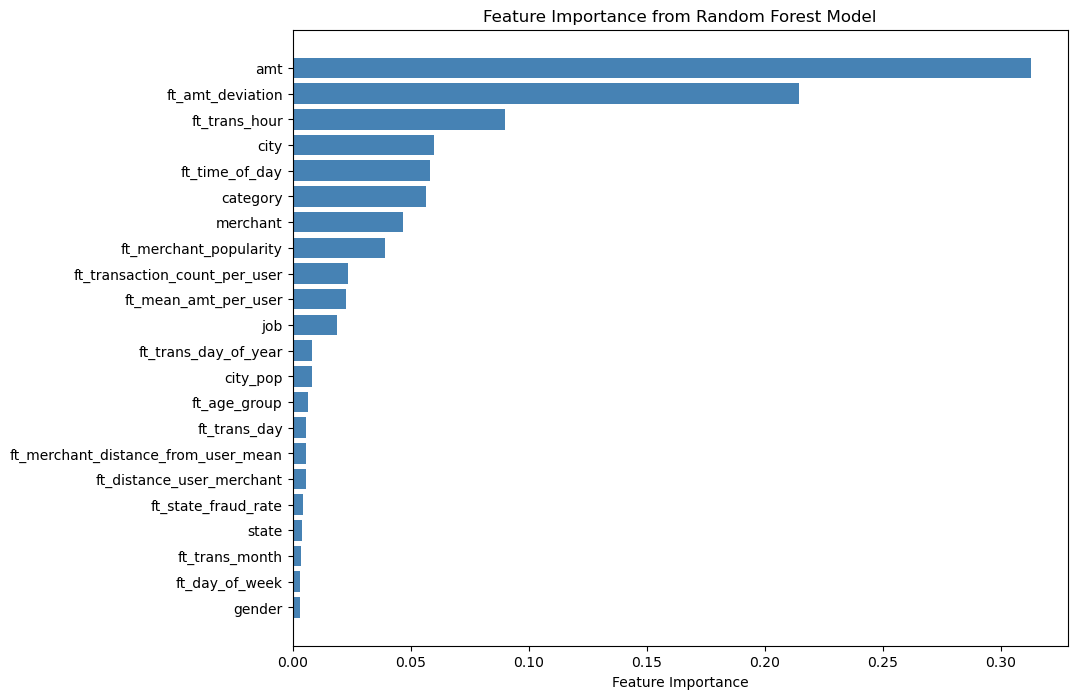

In [35]:
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Create a sorted list of features and their importances
sorted_idx = feature_importances.argsort()
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color='steelblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest Model")
plt.show()


Confusion Matrix for All Models
Evaluate model performance with a confusion matrix:

In [41]:
# Make predictions for Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=500)  # Ensure the model is initialized
lr_model.fit(X_train_scaled, y_train.ravel())  # Fit the model
y_test_pred_lr = lr_model.predict(X_test_scaled)  # Make predictions on the test set


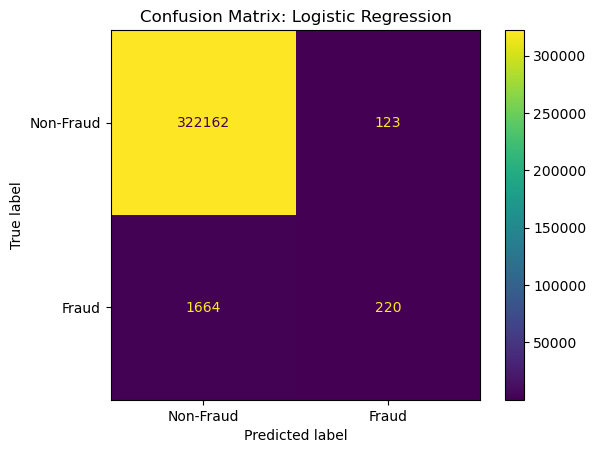

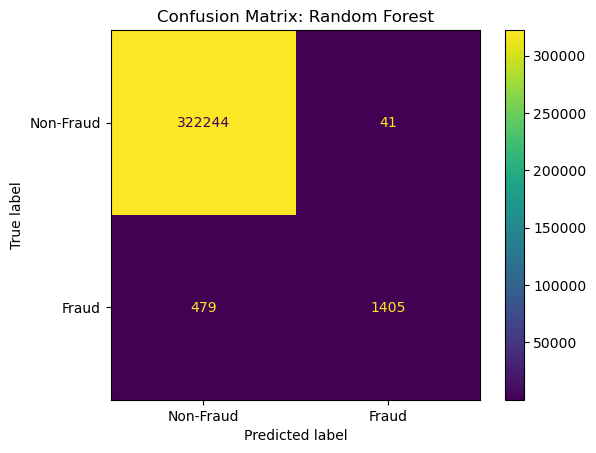

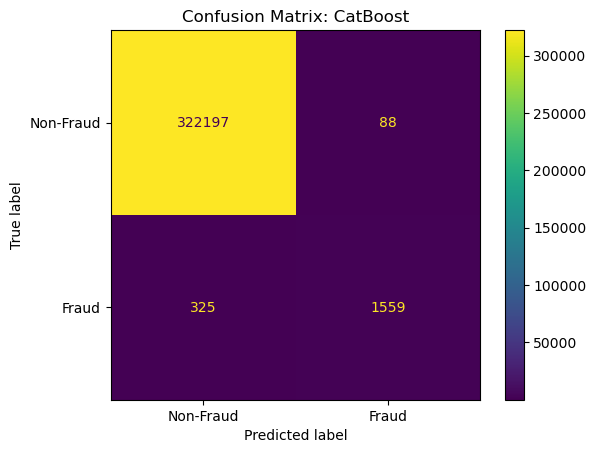

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression
lr_cm = confusion_matrix(y_test, y_test_pred_lr)
ConfusionMatrixDisplay(lr_cm, display_labels=["Non-Fraud", "Fraud"]).plot()
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Random Forest
rf_cm = confusion_matrix(y_test, y_test_pred_rf)
ConfusionMatrixDisplay(rf_cm, display_labels=["Non-Fraud", "Fraud"]).plot()
plt.title("Confusion Matrix: Random Forest")
plt.show()

# CatBoost
if 'y_test_pred_cb' in globals():
    cb_cm = confusion_matrix(y_test, y_test_pred_cb)
    ConfusionMatrixDisplay(cb_cm, display_labels=["Non-Fraud", "Fraud"]).plot()
    plt.title("Confusion Matrix: CatBoost")
    plt.show()


Cross-Validation
Use cross-validation to check model robustness:

reduce the number of folds (e.g., from 10 to 5) or use stratified sampling to speed up the process.

In [45]:
# Reduce number of CV folds to 3 for faster execution
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    LogisticRegression(random_state=42, max_iter=500),
    X_train_scaled,
    y_train.ravel(),
    scoring='balanced_accuracy',
    cv=3  # Fewer folds for speed
)
print("Logistic Regression Cross-Validation Scores:", cv_scores)
print("Mean Balanced Accuracy (Logistic Regression):", cv_scores.mean())


Logistic Regression Cross-Validation Scores: [0.57045771 0.57105648 0.57027933]
Mean Balanced Accuracy (Logistic Regression): 0.5705978387335335


scale down to for Hyperparameter Tuning

In [48]:
from sklearn.model_selection import train_test_split

# Sample 5% of the dataset
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, test_size=0.95, stratify=y_train, random_state=42
)

# Encode categorical variables in the sampled data
X_sample_encoded = encoder.transform(X_sample)

# Split the sampled and encoded data into training and testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample_encoded, y_sample, test_size=0.3, stratify=y_sample, random_state=42
)

# Scale the encoded data
X_train_sample_scaled = scaler.fit_transform(X_train_sample)
X_test_sample_scaled = scaler.transform(X_test_sample)



Hyperparameter Tuning
Optimize hyperparameters for better performance (e.g., Random Forest):


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='balanced_accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train.ravel())

print("Best Parameters:", grid_search.best_params_)
print("Best Balanced Accuracy:", grid_search.best_score_)


KeyboardInterrupt: 

Model Comparison and Final Metrics
Summarize and compare model performances:


In [50]:
import pandas as pd

# Create a summary table of results
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "CatBoost"],
    "Training Balanced Accuracy": [0.8682, 0.9998, 0.9511],
    "Testing Balanced Accuracy": [0.8624, 0.8728, 0.9136]
})

print(results)


                 Model  Training Balanced Accuracy  Testing Balanced Accuracy
0  Logistic Regression                      0.8682                     0.8624
1        Random Forest                      0.9998                     0.8728
2             CatBoost                      0.9511                     0.9136


Here is the code to implement a logistic regression model using Keras.

In [52]:
!pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.4 MB/s eta 0:00:01
     ------------------------------- ------ 41.0/48.7 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 620.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB 660.6 kB/s eta 0:09:51
   ---------------------------------------- 0.1/390.3 MB 825.8 kB/s eta 0:07:53
   ---------------------------------------- 0.1/390.3 MB 655.4 kB/s eta 0:09:56
   ---------------------------------------- 0.1/390.3 MB 731.4 kB/s eta 0:08:54
   ---------------------------------------- 0.2/390.3 MB 756.6 kB/s eta 0:08:36
   ---------------------------------------- 0.2/390.3 MB 737.3 kB/s eta 0:08:50
   ---------------------------------------- 0.2/390.3 MB 754.9 kB/s eta 0:08:37
   ---------------------------------------- 0.2/390.3 MB 

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9865 - loss: 0.0720 - val_accuracy: 0.9950 - val_loss: 0.0246
Epoch 2/50
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9947 - loss: 0.0255 - val_accuracy: 0.9948 - val_loss: 0.0234
Epoch 3/50
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9946 - loss: 0.0251 - val_accuracy: 0.9947 - val_loss: 0.0232
Epoch 4/50
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9946 - loss: 0.0252 - val_accuracy: 0.9948 - val_loss: 0.0232
Epoch 5/50
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9945 - loss: 0.0252 - val_accuracy: 0.9948 - val_loss: 0.0238
Epoch 6/50
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9947 - loss: 0.0253 - val_accuracy: 0.9949 - val_loss: 0.0232
Epoch 7/50
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9946 - loss: 0.0251 - val_accuracy: 0.9950 - val_loss: 0.0235
Epoch 8/50
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 

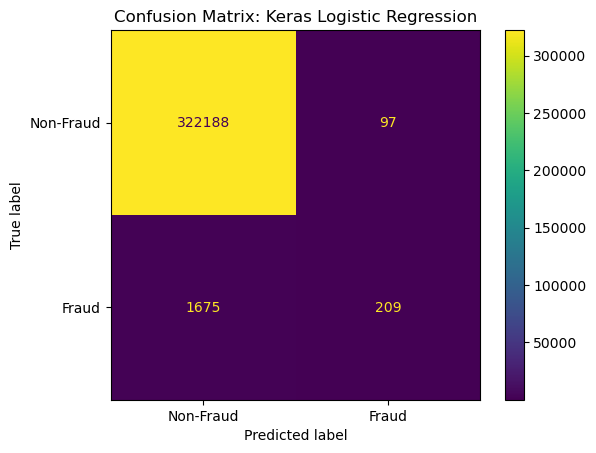

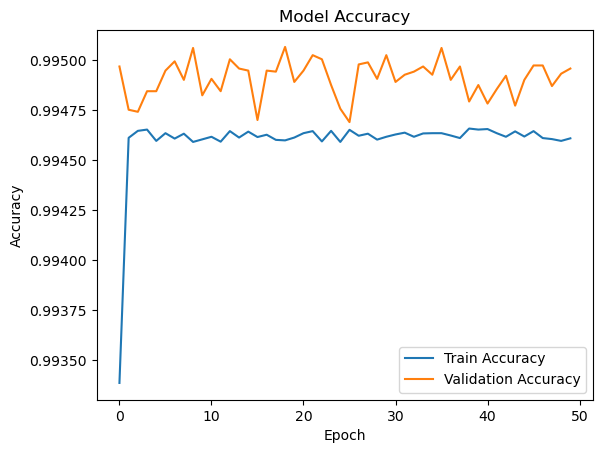

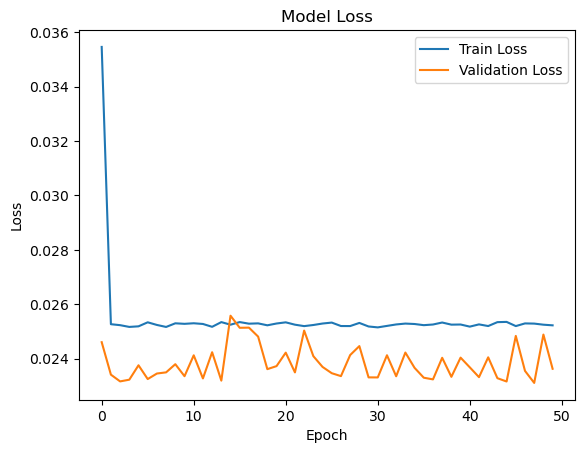

In [55]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Keras logistic regression model
keras_model = Sequential([
    Dense(1, input_dim=X_train_scaled.shape[1], activation='sigmoid')  # Single dense layer with sigmoid activation
])

# Compile the model
keras_model.compile(optimizer=Adam(learning_rate=0.01),  # Optimizer
                    loss='binary_crossentropy',         # Loss function for binary classification
                    metrics=['accuracy'])               # Accuracy metric

# Train the model
history = keras_model.fit(X_train_scaled, y_train.ravel(),  # Flatten y_train for compatibility
                          epochs=50,                      # Number of epochs
                          batch_size=64,                  # Batch size
                          validation_split=0.2,           # Use 20% of training data for validation
                          verbose=1)                      # Show progress

# Evaluate the model on test data
y_test_pred_keras = (keras_model.predict(X_test_scaled) > 0.5).astype(int)  # Predict probabilities and threshold at 0.5
print("Accuracy on Test Set (Keras):", accuracy_score(y_test, y_test_pred_keras))

# Display confusion matrix
keras_cm = confusion_matrix(y_test, y_test_pred_keras)
ConfusionMatrixDisplay(keras_cm, display_labels=["Non-Fraud", "Fraud"]).plot()
plt.title("Confusion Matrix: Keras Logistic Regression")
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
